## QR2: Least Squares and Computing Eigenvalues

### Problem 1:

In [5]:
import numpy as np
from cmath import sqrt
from scipy import linalg as la
from matplotlib import pyplot as plt

In [6]:
def solve1(A, b):
    Q, R = la.qr(A, mode='economic')
    rhand = Q.T @ b
    return la.solve_triangular(R, rhand)

### Problem 2:

In [109]:
def plthousing():
    housing = np.load('housing.npy')
    yr = housing[:,0]                                 
    p = housing[:,1]
    ones = np.ones_like(yr)
    A = np.column_stack((yr, ones))
    
    betas = solve1(A, p)
    beta = betas[0]
    alpha = betas[1]
  
    fit = beta*yr + alpha
    
    plt.scatter(yr, p, color='black', marker='*', s=5, label='Data Points')
    plt.plot(fit, lw=1, color='blue', label='Least Squares Fit')
    plt.xlim([0, 16])
    plt.xlabel("Year (2000+)")
    plt.ylabel("Prices")
    plt.title("Puchase-Only Housing Prices, 2000-2016")
    plt.legend()
    plt.show()


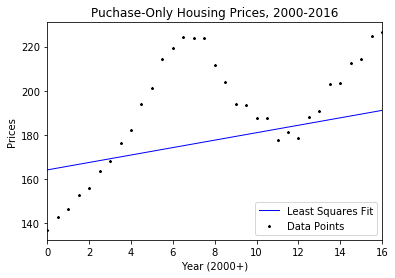

In [110]:
plthousing()

### Problem 3:

In [155]:
def plthousing_poly():
    housing = np.load('housing.npy')
    yr = housing[:,0]                                 
    p = housing[:,1]
    ones = np.ones_like(yr)
    
    domain = np.linspace(0, 16, 200)

    A_3 = np.vander(yr, 4)
    x_3 = la.lstsq(A_3, p)[0]
    f_3 = np.poly1d(x_3)
    y_3 = f_3(domain)
    
    A_6 = np.vander(yr, 7)
    x_6 = la.lstsq(A_6, p)[0]
    f_6 = np.poly1d(x_6)
    y_6 = f_6(domain)
    
    A_9 = np.vander(yr, 10)
    x_9 = la.lstsq(A_9, p)[0]
    f_9 = np.poly1d(x_9)
    y_9 = f_9(domain)
    
    A_12 = np.vander(yr, 13)
    x_12 = la.lstsq(A_12, p)[0]
    f_12 = np.poly1d(x_12)
    y_12 = f_12(domain)
    
    plt.subplot(221)
    plt.scatter(yr, p, color='black', marker='*', s=5, label='Data Points')
    plt.plot(domain, y_3, color='blue')
    plt.title("Deg = 3")
    plt.ylabel("Price")
    
    plt.subplot(222)
    plt.scatter(yr, p, color='black', marker='*', s=5, label='Data Points')
    plt.plot(domain, y_6, color='blue')
    plt.title("Deg = 6")
    
    plt.subplot(223)
    plt.scatter(yr, p, color='black', marker='*', s=5, label='Data Points')
    plt.plot(domain, y_9, color='blue')
    plt.title("Deg = 9")
    plt.ylabel("Price")
    plt.xlabel("Year (2000+)")
    
    plt.subplot(224)
    plt.scatter(yr, p, color='black', marker='*', s=5, label='Data Points')
    plt.plot(domain, y_12, color='blue')
    plt.title("Deg = 12")
    plt.xlabel("Year (2000+)")
    
    plt.tight_layout()
    plt.show()
    

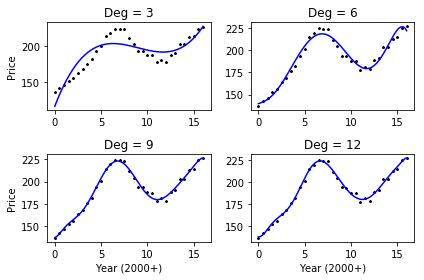

In [156]:
plthousing_poly()

### Problem 4:

In [265]:
def circleplot():
    xk, yk = np.load('ellipse.npy').T
    A = np.column_stack((xk**2, xk, xk*yk, yk, yk**2))
    b = np.ones_like(xk)
    
    a, b, c, d, e = la.lstsq(A, b)[0]
    print(a, b, c, d, e)
    
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=1, color='blue')
    plt.gca().set_aspect("equal", "datalim") 
    plt.scatter(xk, yk, color='black', marker='*', s=4)
    plt.show()

0.0869616583673 -0.141352437846 0.159457218443 -0.315650127752 0.366158417025


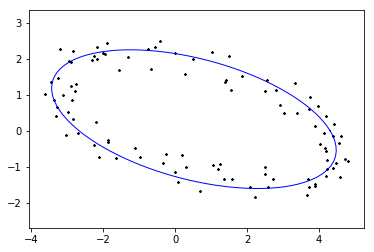

In [266]:
circleplot()

### Problem 5:

In [218]:
def powermethod(A, N, tol):
    m,n = np.shape(A)
    x = np.random.random(n)
    x /= la.norm(x)
    for k in range(1,N):
        x_prev = x
        x = A@x
        x /= la.norm(x)
        if la.norm(x - x_prev) <= tol:
            break
    
    return x.T @ A @ x, x

In [219]:
A = np.random.random((10,10))
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]

mylamb, myx = powermethod(A, 1000, 1e-3)
print(lamb, x)
print(mylamb, myx)

(4.79907864907+0j) [ 0.25670711+0.j  0.26831972+0.j  0.42672921+0.j  0.35946998+0.j
  0.19793942+0.j  0.26700626+0.j  0.29775255+0.j  0.31858462+0.j
  0.30680318+0.j  0.39501420+0.j]
4.79904900174 [ 0.25668261  0.26828994  0.42674826  0.35945149  0.19795841  0.26700363
  0.29773448  0.3186015   0.30682602  0.39502112]


### Problem 6:

In [263]:
def QR_hess(A, N, tol):
    m,n = np.shape(A)
    S = la.hessenberg(A)
    for k in range(N):
        Q, R = la.qr(S, mode='economic')
        S = R@Q
    eigs = []
    i = 0
    while i < n:
        S_i = S[i,i]
        if (i == n-1):
            eigs = np.append(eigs, S_i)
        elif (abs(S[i+1,i] <= tol)):
            eigs = np.append(eigs, S_i)
        else:
            b = (-1)* (S_i[i,i] + S_i[i+1, i+1])
            c = -b - S_i[i, i+1] * S_i[i+1,]
            eig1 = (-b + cmath.sqrt(b**2 - 4*c))/2
            eig2 = (-b - cmath.sqrt(b**2 - 4*c))/2
            eigs = np.append(eigs, [eig1, eig2])
            i += 1
        i += 1
    return eigs

In [264]:
A = np.random.random((5,5))
A += A.T

QR_hess(A, 100, 1e-4)

array([ 3.63379723,  1.2177057 , -1.00268262,  0.39433233,  0.08329272])

My output matches the output of la.eig(A)